In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv(r"C:\Users\\Sasha\\Desktop\\Py\\Git\\UdemyExerciseML\\Machine Learning A-Z (Codes and Datasets)\\Part 6 - Reinforcement Learning\\Section 32 - Upper Confidence Bound (UCB)\\Python\\Ads_CTR_Optimisation.csv")

In [5]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [19]:
import math
N = 10000 # number of people doing test
d = 10 #number of rounds
ad_selected = []
numbers_of_selectiond = [0] * d
sums_of_rewards = [0] * d 
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if numbers_of_selectiond[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selectiond[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selectiond[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ad_selected.append(ad)
    numbers_of_selectiond[ad] += 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

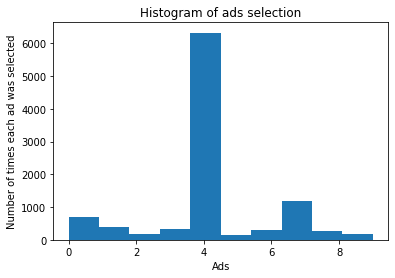

In [20]:
plt.hist(ad_selected)
plt.title("Histogram of ads selection")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()